## Codes for visualization of KoNER (CONFUSION MATRIX)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix

In [ ]:
#y_ture and y_pred are the list of labels, and the labels are a distinct label list
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True,
                          outname="./confusionMatirx.pdf"):
    """
    given a sklearn confusion matrix (cm), make a Nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    plt.figure(figsize=(15, 15))
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=60 ,fontsize=20)
        plt.yticks(tick_marks, target_names ,fontsize=20)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center", fontsize="20",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center", fontsize="20",
                     color="white" if cm[i, j] > thresh else "black")
            
    #plt.colorbar()
    plt.tight_layout()
    #plt.title('Accuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass), fontsize=20)
    plt.title('The Join model', fontsize=20)
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.savefig(os.path.join(outname), dpi=300, format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
y_pred = []
y_true = []

labels = ['NOUN\n', 'PUNCT\n', 'VERB\n', 'PRON\n', 'ADP\n', 'DET\n', 'PROPN\n', 'ADJ\n', 'AUX\n', 'ADV\n', 'CCONJ\n', 'PART\n', 'NUM\n', 'SCONJ\n', 'X\n', 'INTJ\n', 'SYM\n']

#labels = ['org_i\n', 'evt_i\n', 'plt_b\n', 'num_b\n', 'loc_i\n', 'mat_i\n', 'org_b\n', 'trm_b\n', 'tim_b\n', 'num_i\n', 'tim_i\n', 'fld_i\n', 'o\n', 'trm_i\n', 'anm_b\n', 'evt_b\n', 'cvl_b\n', 'afw_b\n', 'loc_b\n', 'dat_b\n', 'fld_b\n', 'per_b\n', 'anm_i\n', 'cvl_i\n', 'afw_i\n', 'mat_b\n', 'plt_i\n', 'per_i\n', 'dat_i\n']
#with open("./results/upos_predicted_0.8762261655461259_0.8764837749439565") as pred:
#with open("./results/xpos_predicted_0.8731381518755719_0.8767961486163683") as pred:
with open("./results/predicted_0.9684") as pred:
    tag = pred.readlines()[0:-1]
    y_pred.extend(tag)
    
#with open("./results/upos_gold_0.8762261655461259_0.8764837749439565") as gold:
#with open("./results/xpos_gold_0.8731381518755719_0.8767961486163683") as gold:
with open("./results/gold_0.9684") as gold:
    tag = gold.readlines()[0:-1]
    y_true.extend(tag)
'''
keys = set(y_true)
labels = list(keys)
keyToi = {label: i  for i, label in enumerate(labels)}
pred = [ keyToi[pred] for pred in y_pred ]
true = [ keyToi[true] for true in y_true ]
'''    

In [ ]:
cm = confusion_matrix(y_true, y_pred, labels=labels)

In [ ]:
plot_confusion_matrix(cm,labels, normalize=True, outname="./upos_join.pdf")

In [ ]:
y_pred = []
y_actu = []
with open("./results/predicted_0.9736") as pred:
    tag = pred.readlines()[0:-1]
    y_pred.extend(tag)
    
with open("./results/gold_0.9736") as gold:
    tag = gold.readlines()[0:-1]
    y_actu.extend(tag)

y_actu = pd.Series(y_actu, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [ ]:
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['True Label'], colnames=['Predicted Label'], margins=True)

In [ ]:
df_confusion.shape
df_confusion

In [ ]:
df_conf_norm = df_confusion / df_confusion.sum(axis=1)
df_conf_norm

In [ ]:
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
#plt.figure(figsize=(9, 8))
df_confusion = df_conf_norm
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.get_cmap('Blues'), include_values=True):#plt.cm.gray_r):
    fig = plt.figure(figsize=(12, 12))
    #ax = plt.gca()
    #im = ax.imshow(df_confusion, cmap=cmap)
    plt.imshow(df_confusion, cmap=cmap)
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=60, fontsize=15)
    plt.yticks(tick_marks, df_confusion.index, fontsize=15)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name, fontsize=20)
    plt.xlabel(df_confusion.columns.name, fontsize=20)
    plt.colorbar()

plot_confusion_matrix(df_confusion)

plt.savefig(os.path.join("./",'xpos_xmlroberta_result.pdf'), dpi=300, format='pdf')
plt.show()


# Attention Visualization

In [ ]:
import numpy as np

latex_special_token = ["!@#$%^&*()"]

def generate(text_list, attention_list, latex_file, color='red', rescale_value = False):
	assert(len(text_list) == len(attention_list))
	if rescale_value:
		attention_list = rescale(attention_list)
	word_num = len(text_list)
	text_list = clean_word(text_list)
	with open(latex_file,'w') as f:
		f.write(r'''\documentclass[varwidth]{standalone}
\special{papersize=210mm,297mm}
\usepackage{color}
\usepackage{tcolorbox}
\usepackage{CJK}
\usepackage{adjustbox}
\tcbset{width=0.9\textwidth,boxrule=0pt,colback=red,arc=0pt,auto outer arc,left=0pt,right=0pt,boxsep=5pt}
\begin{document}
\begin{CJK*}{UTF8}{gbsn}'''+'\n')
		string = r'''{\setlength{\fboxsep}{0pt}\colorbox{white!0}{\parbox{0.9\textwidth}{'''+"\n"
		for idx in range(word_num):
			string += "\\colorbox{%s!%s}{"%(color, attention_list[idx])+"\\strut " + text_list[idx]+"} "
		string += "\n}}}"
		f.write(string+'\n')
		f.write(r'''\end{CJK*}
\end{document}''')

def rescale(input_list):
	the_array = np.asarray(input_list)
	the_max = np.max(the_array)
	the_min = np.min(the_array)
	rescale = (the_array - the_min)/(the_max-the_min)*100
	return rescale.tolist()


def clean_word(word_list):
	new_word_list = []
	for word in word_list:
		for latex_sensitive in ["\\", "%", "&", "^", "#", "_",  "{", "}"]:
			if latex_sensitive in word:
				word = word.replace(latex_sensitive, '\\'+latex_sensitive)
		new_word_list.append(word)
	return new_word_list

In [ ]:
#sent = '''Syria has agreed to withdraw under the conditions set forth in UNSC Resolution 1559 , which has already begun .'''
sent = '''Syria has agreed to withdraw under the conditions set forth in UNSC Resolution 1559.'''
#sent = '''我 回忆 起 我 曾经 在 大学 年代 ， 我们 经常 喜欢 玩 “ Hawaii guitar ” 。 说起 Guitar ， 我 想起 了 西游记 里 的 琵琶精. 今年 下半年 ， 中 美 合拍 的 西游记 即将 正式 开机 ， 我 继续 扮演 美猴王 孙悟空 ， 我 会 用 美猴王 艺术 形象 努力 创造 一 个 正能量 的 形象 ， 文 体 两 开花 ， 弘扬 中华 文化 ， 希望 大家 能 多多 关注 。'''
words = sent.split()
word_num = len(words)
attention = [(x+1.)/word_num*100 for x in range(word_num)]
import random
random.seed(42)
random.shuffle(attention)
color = 'red'
generate(words, attention, "sample.tex", color, rescale_value=1)

In [ ]:
import random
#sent = '''Syria has agreed to withdraw under the conditions set forth in UNSC Resolution 1559 , which has already begun .'''
sent = '''Syria has agreed to withdraw under the conditions set forth in UNSC Resolution 1559.'''
#sent = '''我 回忆 起 我 曾经 在 大学 年代 ， 我们 经常 喜欢 玩 “ Hawaii guitar ” 。 说起 Guitar ， 我 想起 了 西游记 里 的 琵琶精. 今年 下半年 ， 中 美 合拍 的 西游记 即将 正式 开机 ， 我 继续 扮演 美猴王 孙悟空 ， 我 会 用 美猴王 艺术 形象 努力 创造 一 个 正能量 的 形象 ， 文 体 两 开花 ， 弘扬 中华 文化 ， 希望 大家 能 多多 关注 。'''
words = sent.split()
word_num = len(words)

global_attention = []
for word in words:
    for char in word:
        attention = [(x+1.)/word_num*100 for x in range(word_num)]
        random.seed(42)
        random.shuffle(attention)
        color = 'red'
        global_attention.append(attention)
generate(words, attention, "sample.tex", color)

# Graphs

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl

In [13]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [14]:
#===========================================================
# Directory and filename; style file open
#===========================================================
# Change to the directory which contains the current script
#dirFile = os.path.dirname(os.path.join('./','Figures.ipynb'))
dirFile = os.path.dirname("./")
# Load style file
plt.style.use(os.path.join(dirFile, 'PaperDoubleFig.mplstyle'))
# Make some style choices for plotting
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

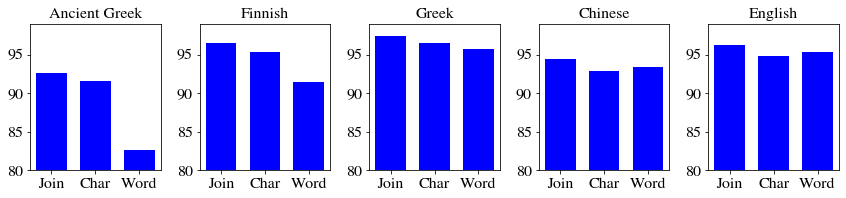

In [15]:


plt.close('all')


names = ['Join', 'Char', 'Word']
Ancient_Greek = [92.63, 91.58, 82.67]
Finnish = [96.43, 95.29, 91.5]
Greek = [97.35, 96.51, 95.66]
Chinese = [94.36, 92.81, 93.43]
English = [96.19, 94.82, 95.37]

plt.figure(1, figsize=(12, 3))


plt.subplot(1,5,1,)
plt.ylim(80, 99)
plt.title('Ancient Greek')
plt.subplots_adjust(wspace=0.5, hspace=0)
plt.bar(names, Ancient_Greek, color = 'b', width=0.7)

plt.subplot(1,5,2, )
plt.ylim(80, 99)
plt.title('Finnish')
plt.bar(names, Finnish, color = 'b', width=0.7)
plt.subplot(1,5,3)
plt.ylim(80, 99)
plt.title('Greek')
plt.bar(names, Greek, color = 'b', width=0.7)
plt.subplot(1,5,4)
plt.ylim(80, 99)
plt.title('Chinese')
plt.bar(names, Chinese, color = 'b', width=0.7)
plt.subplot(1,5,5)
plt.ylim(80, 99)
plt.title('English')
plt.bar(names, English, color = 'b', width=0.7)
#plt.suptitle('Categorical Plotting')
#plt.show()

dirFile = os.path.dirname("./")
plt.savefig(os.path.join(dirFile,'result2.pdf'),dpi=300)
plt.show()

# Chart

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl

In [24]:
#===========================================================
# Directory and filename; style file open
#===========================================================
# Change to the directory which contains the current script
#dirFile = os.path.dirname(os.path.join('./','Figures.ipynb'))
dirFile = os.path.dirname("./")
# Load style file
plt.style.use(os.path.join(dirFile, 'PaperDoubleFig.mplstyle'))
# Make some style choices for plotting
colourWheel =['#329932',
            '#ff6961',
            'b',
            '#6a3d9a',
            '#fb9a99',
            '#e31a1c',
            '#fdbf6f',
            '#ff7f00',
            '#cab2d6',
            '#6a3d9a',
            '#ffff99',
            '#b15928',
            '#67001f',
            '#b2182b',
            '#d6604d',
            '#f4a582',
            '#fddbc7',
            '#f7f7f7',
            '#d1e5f0',
            '#92c5de',
            '#4393c3',
            '#2166ac',
            '#053061']
dashesStyles = [[3,1],
            [1000,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1]]

In [35]:
# Point to the data
fileName = 'experiment.xlsx'

#===========================================================
# Read in and prep the data
#===========================================================
df = pd.read_excel(os.path.join(dirFile,fileName), sheet_name='num-training-data', index_col=0)
#df = pd.DataFrame()
#print(df)
#df = df.iloc[3:,:]
#print(df)
#df = df.rename(columns=dict(zip(df.columns,df.iloc[0,:])))
#df = df.iloc[2:,:]
#print(df)
#df = df.rename(columns={np.nan:'Year'}).set_index('Year')
#df = df.dropna()
#print(df)
# Take a look to make sure this has worked nicely
df.head()

,SBD-single,SBD-multi,POS-multi,NER-multi
1000,75.24,78.11,97.92,91.50
2500,80.11,82.20,98.64,92.30
5000,84.21,86.03,98.74,92.94
10000,85.34,86.51,98.95,93.46
20000,86.80,87.51,99.17,94.16


In [ ]:
df.loc[500,'single'] = 86.01
df.loc[1000,'single'] = 89.58
df.loc[2500,'single'] = 91.13
df.loc[5000,'single'] = 92.07
df.loc[10000,'single'] = 93.36
df.loc[20000,'single'] = 90.92
df.loc[29100,'single'] = 91.70

df.loc[500,'multi'] = 82.01
df.loc[1000,'multi'] = 90.58
df.loc[2500,'multi'] = 92.13
df.loc[5000,'multi'] = 93.07
df.loc[10000,'multi'] = 94.36
df.loc[20000,'multi'] = 95.92
df.loc[29100,'multi'] = 96.70
df.head()

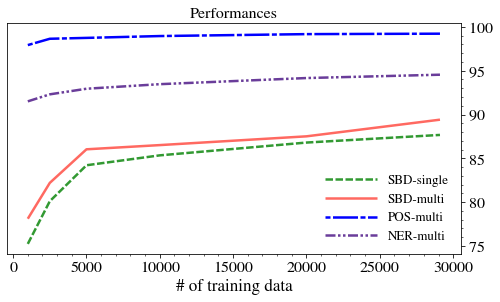

In [36]:
#https://matplotlib.org/tutorials/introductory/pyplot.html

plt.close('all')
fig, ax = plt.subplots()
for j,series in enumerate(df.columns[:]):
    if(series=='Korean'):
        alphaVal = 1.
        linethick=3
    else:
        alphaVal = 1.
        linethick = 2.5
    ax.plot(df[series].index,
                df[series]/1.,
                color=colourWheel[j%len(colourWheel)],
                linestyle = '-',
                dashes=dashesStyles[j%len(dashesStyles)],
                lw=linethick,
                label=series,
                alpha=alphaVal)
ax.set_xlabel('# of training data')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.major.formatter._useMathText = True
ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
#ax.yaxis.set_label_coords(0.63,1.01)
ax.yaxis.tick_right()
nameOfPlot = 'Performances'
#plt.ylabel(nameOfPlot,rotation=0)
#plt.ylabel('Scores')
plt.title('Performances')
plt.grid=True
#plt.ylim(0.2, 1)
#plt.annotate('local max', xy=(400, 0.93), xytext=(400, 0.95), arrowprops=dict(facecolor='black', shrink=0.05,),)
ax.legend(frameon=False, loc='lower right',ncol=1,handlelength=4)
#plt.savefig("./abc.pdf",dpi=100)
plt.savefig(os.path.join(dirFile,'trainingdata.pdf'),dpi=300)
plt.show()